# ESILV - Python for data analysis - project 2022

## 1) Install and Import of Libraries

In [252]:
#important librairies
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#install packages
!pip install bokeh
!pip install xgboost
!brew install libomp

'brew' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [253]:
#Import for part 3
from sklearn.preprocessing import MinMaxScaler

#Import for part 4
from matplotlib import pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Turbo256
from bokeh.transform import linear_cmap
from bokeh.palettes import brewer
import seaborn as sns

#Import for part 5
import time
from decimal import *

#Import for part 6
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [254]:
#Charge the Dataset
SeoulBikeDf = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
#We display it
SeoulBikeDf.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2) Quick Analyze

 - Dataset : Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.

 - Target : The good renter number of bike by hours.

In [255]:
#Size of the dataset
print('Number of columns : ' +  str(SeoulBikeDf.shape[1]))
print('Number of row : ' + str(SeoulBikeDf.shape[0]))

Number of columns : 14
Number of row : 8760


In [256]:
#Check type of columns
SeoulBikeDf.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [257]:
#Why 8760 row ?
SeoulBikeDf.groupby("Date")["Rented Bike Count"].count()
#Now, We can confirm that we have exactly 1 years of dataset because : 24 * 365 = 8760

Date
01/01/2018    24
01/02/2018    24
01/03/2018    24
01/04/2018    24
01/05/2018    24
              ..
31/05/2018    24
31/07/2018    24
31/08/2018    24
31/10/2018    24
31/12/2017    24
Name: Rented Bike Count, Length: 365, dtype: int64

## 3) Clear the dataset

In [258]:
#Check is Nan value in the dataframe
print ('Missing values in the dataset ? -> ' + str(SeoulBikeDf.isnull().values.any()))
print ('Improper values in the dataset ? -> ' + str(SeoulBikeDf.isna().values.any()))

Missing values in the dataset ? -> False
Improper values in the dataset ? -> False


In [259]:
#Transformation quantitative variable to vector
print('Before transformation of Functioning Day : ' + str(SeoulBikeDf['Functioning Day'].unique()))
SeoulBikeDf['Functioning Day'] = SeoulBikeDf['Functioning Day'].replace(to_replace=['No', 'Yes'], value=[0, 1])
print('After transformation of Functioning Day : ' + str(SeoulBikeDf['Functioning Day'].unique()) + "\n")

print('Before transformation of Holiday : ' + str(SeoulBikeDf['Holiday'].unique()))
SeoulBikeDf['Holiday'] = SeoulBikeDf['Holiday'].replace(to_replace=['No Holiday', 'Holiday'], value=[0, 1])
print('After transformation of Holiday : ' + str(SeoulBikeDf['Holiday'].unique()) + "\n")

print('Before transformation of Seasons : ' + str(SeoulBikeDf['Seasons'].unique()))
SeoulBikeDf['Seasons'] = SeoulBikeDf['Seasons'].replace(to_replace=['Winter', 'Spring', 'Summer', 'Autumn'], value=[0, 1, 2, 3])
print('After transformation of Season : ' + str(SeoulBikeDf['Seasons'].unique()) + "\n")

Before transformation of Functioning Day : ['Yes' 'No']
After transformation of Functioning Day : [1 0]

Before transformation of Holiday : ['No Holiday' 'Holiday']
After transformation of Holiday : [0 1]

Before transformation of Seasons : ['Winter' 'Spring' 'Summer' 'Autumn']
After transformation of Season : [0 1 2 3]



In [260]:
#We transfrom Date data into 4 new columns :  day, month, years and dayofweek
SeoulBikeDf['Years'] = pd.to_datetime(SeoulBikeDf['Date']).dt.year
SeoulBikeDf['Month'] = pd.to_datetime(SeoulBikeDf['Date']).dt.month
SeoulBikeDf['Day'] = pd.to_datetime(SeoulBikeDf['Date']).dt.day
SeoulBikeDf['Dayofweek'] = pd.to_datetime(SeoulBikeDf['Date']).dt.dayofweek

#Monday starting at 0 so we add + 1 at all the colomn
SeoulBikeDf['Dayofweek'] += 1 

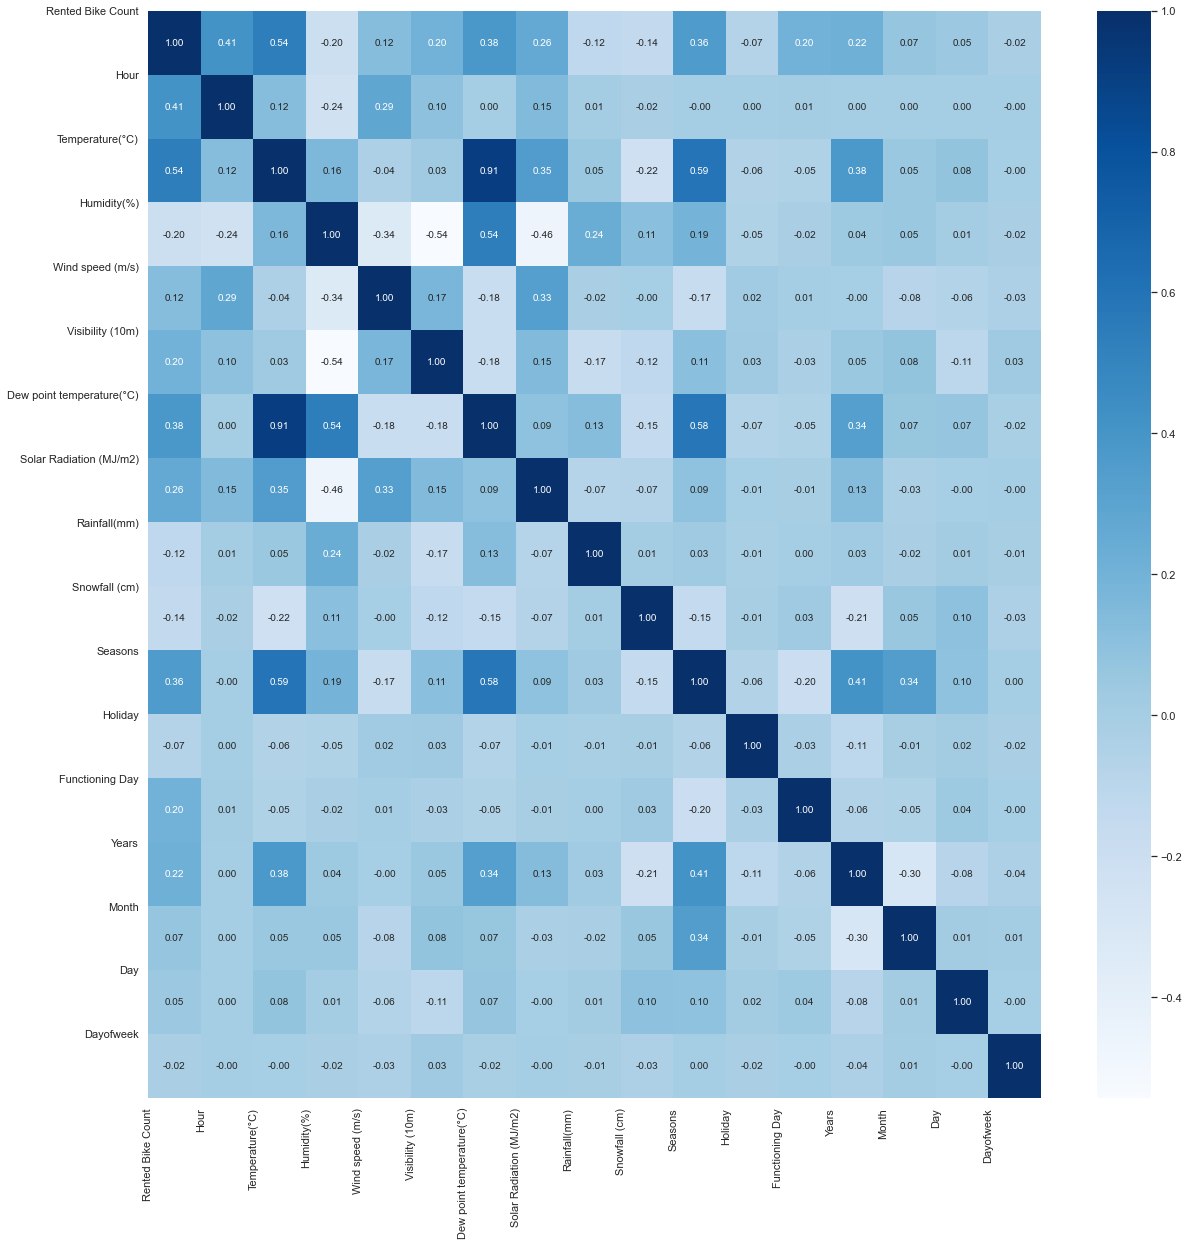

In [261]:
#Create Correlation Dataframe
corr = SeoulBikeDf.corr()

# Plot figsize and Generate Color Map
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")

#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

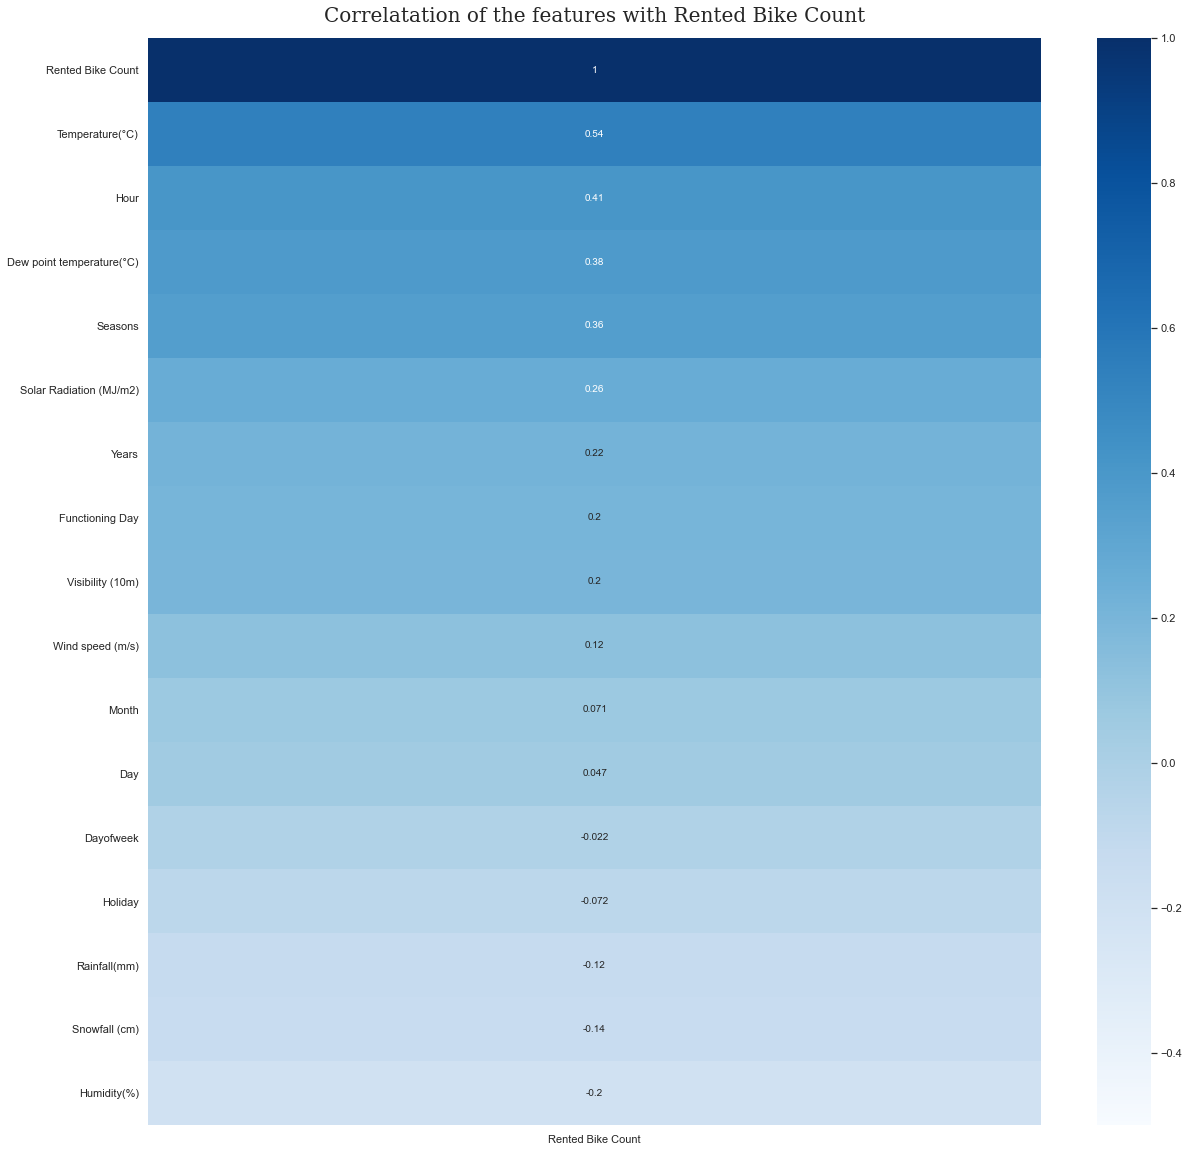

In [262]:
#We focus only on the target correlation
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(SeoulBikeDf.corr()[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-0.5, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlatation of the features with Rented Bike Count', pad=16, fontdict={'family': 'serif','size': 20});

In [263]:
# Check min and max value for a potential scaling
col1 = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
col2 = [str(SeoulBikeDf['Temperature(°C)'].min()), str(SeoulBikeDf['Humidity(%)'].min()), str(SeoulBikeDf['Wind speed (m/s)'].min()), str(SeoulBikeDf['Visibility (10m)'].min()), str(SeoulBikeDf['Dew point temperature(°C)'].min()), str(SeoulBikeDf['Solar Radiation (MJ/m2)'].min()), str(SeoulBikeDf['Rainfall(mm)'].min()), str(SeoulBikeDf['Snowfall (cm)'].min())]
col3 = [str(SeoulBikeDf['Temperature(°C)'].max()), str(SeoulBikeDf['Humidity(%)'].max()), str(SeoulBikeDf['Wind speed (m/s)'].max()), str(SeoulBikeDf['Visibility (10m)'].max()), str(SeoulBikeDf['Dew point temperature(°C)'].max()), str(SeoulBikeDf['Solar Radiation (MJ/m2)'].max()), str(SeoulBikeDf['Rainfall(mm)'].max()), str(SeoulBikeDf['Snowfall (cm)'].max())]
SeoulBikeDfMinMax = pd.DataFrame({'Name': col1, 'Min': col2, 'Max': col3})
SeoulBikeDfMinMax

,Name,Min,Max
0,Temperature(°C),-17.8,39.4
1,Humidity(%),0,98
2,Wind speed (m/s),0.0,7.4
3,Visibility (10m),27,2000
4,Dew point temperature(°C),-30.6,27.2
5,Solar Radiation (MJ/m2),0.0,3.52
6,Rainfall(mm),0.0,35.0
7,Snowfall (cm),0.0,8.8


In [264]:
# For make differents testing we create 5 datasets for testing different model 
# First dataset is with qualitative brut data
SeoulBikeDf1 = SeoulBikeDf.copy().drop(['Date', 'Dayofweek'], axis = 1)

# Second Dataset without years and the dew temperature
SeoulBikeDf2 = SeoulBikeDf.copy().drop(['Date', 'Dew point temperature(°C)','Years'], axis = 1)

# Third Dataset without bad correlations columns
SeoulBikeDf3 = SeoulBikeDf2.copy()
SeoulBikeDf3 = SeoulBikeDf3.drop(['Humidity(%)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday'], axis = 1)

# Fourth dataset have a new columns which scale the visibility
SeoulBikeDf4 = SeoulBikeDf3.copy()
SeoulBikeDf4_scaled = MinMaxScaler().fit_transform(SeoulBikeDf4.to_numpy())
SeoulBikeDf4_scaled = pd.DataFrame(SeoulBikeDf4_scaled, columns=['Rented Bike Count','Hour','Temperature(°C)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Seasons','Functioning Day','Month','Day','Dayofweek'])
SeoulBikeDf4['Visibility (10m)'] = SeoulBikeDf4_scaled['Visibility (10m)']

# Last Dataset remplace weather data by integer corresponding to a type
SeoulBikeDf5 = SeoulBikeDf2.copy()
# Rainfall and Snowfall is 1 if they are water on the road
SeoulBikeDf5['Rainfall(mm)'] = SeoulBikeDf5['Rainfall(mm)'].apply(lambda x: 1 if x > 0 else 0)
SeoulBikeDf5['Snowfall (cm)'] = SeoulBikeDf5['Snowfall (cm)'].apply(lambda x: 1 if x > 0 else 0)
# Humidity based on information founded on monexpert-renovation-energie.fr/
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] <= 20, 'Humidity(%)'] = 0
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] >= 50, 'Humidity(%)'] = 2
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] < 2, 'Humidity(%)'] = 1
# Visibility based on information founded on alarmemeteo.ch
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] <= 40, 'Visibility (10m)'] = 0
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] >= 80, 'Visibility (10m)'] = 2
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] < 2, 'Visibility (10m)'] = 1
# Wind Speed based to the Beaufort scale
SeoulBikeDf5['Wind speed (m/s)'] = SeoulBikeDf5['Wind speed (m/s)'].apply(lambda x: 1 if x >= 3.3 else 0)
# Rename coloms
SeoulBikeDf5 = SeoulBikeDf5.rename({'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall', 'Humidity(%)': 'Humidity', 'Visibility (10m)': 'Visibility', 'Wind speed (m/s)': 'Wind speed'}, axis=1)

## 4) Data-visualization

In [265]:
#We create sum dataframe for scattler plot
dfMonth = SeoulBikeDf.groupby('Month').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfHour = SeoulBikeDf.groupby('Hour').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})

dfHour.head()
dfMonth

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Month,,,,,,,,,,,,
1,287244,2.722849,52.931452,1.813038,1392.811828,-6.599059,0.355175,0.121371,0.250269,0.580645,0.096774,1.000000
2,264112,6.484375,51.785714,1.838393,1451.800595,-3.832143,0.510818,0.149702,0.066518,0.642857,0.107143,0.964286
3,455037,11.436694,59.829301,1.913844,1241.911290,3.104570,0.595403,0.094220,0.002957,1.193548,0.032258,0.967742
4,556219,13.711250,53.630556,1.852639,1440.533333,3.188889,0.733667,0.149583,0.000000,1.200000,0.000000,0.966667
5,665948,16.620296,60.740591,1.759409,1348.532258,8.294624,0.688911,0.290323,0.000000,1.193548,0.032258,1.000000
6,706728,18.998194,65.637500,1.694583,1196.531944,11.730000,0.677778,0.359444,0.011944,1.800000,0.033333,0.956944
7,691339,23.125403,60.586022,1.664919,1527.458333,14.497446,0.777325,0.015054,0.013978,1.806452,0.000000,1.000000
8,614190,21.259140,62.998656,1.677151,1658.043011,13.169892,0.605296,0.324597,0.006048,1.806452,0.032258,1.000000


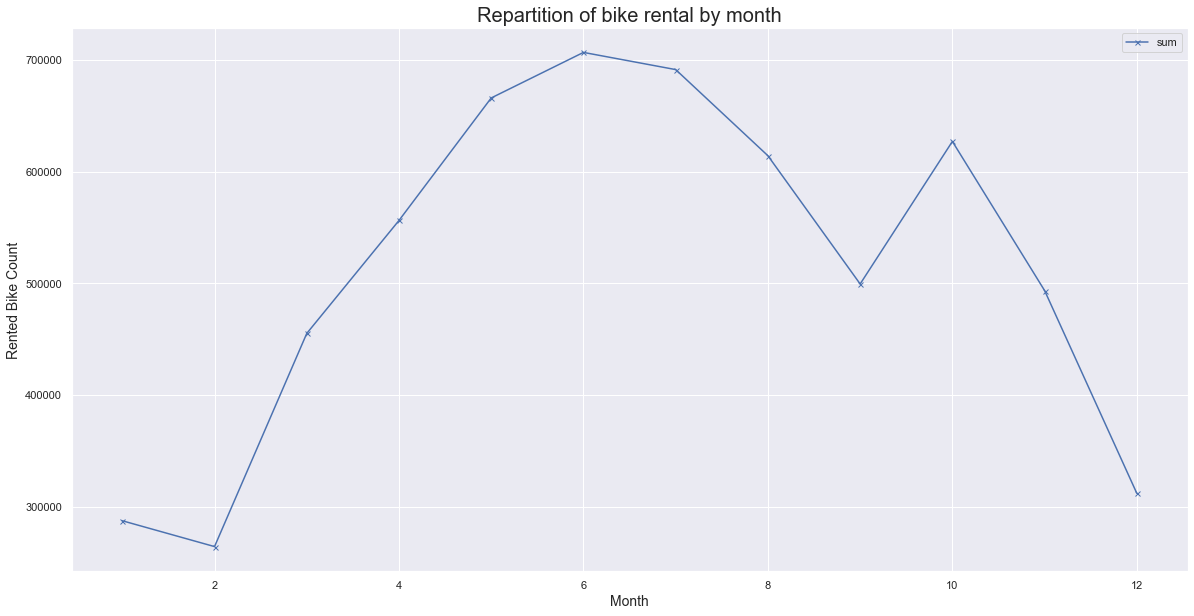

In [266]:
dfMonth.plot(y="Rented Bike Count", marker="x", markersize=5, figsize=(20,10));
plt.title("Repartition of bike rental by month", fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.show()
#They are most rented bike during the summer but they are a little increase in october

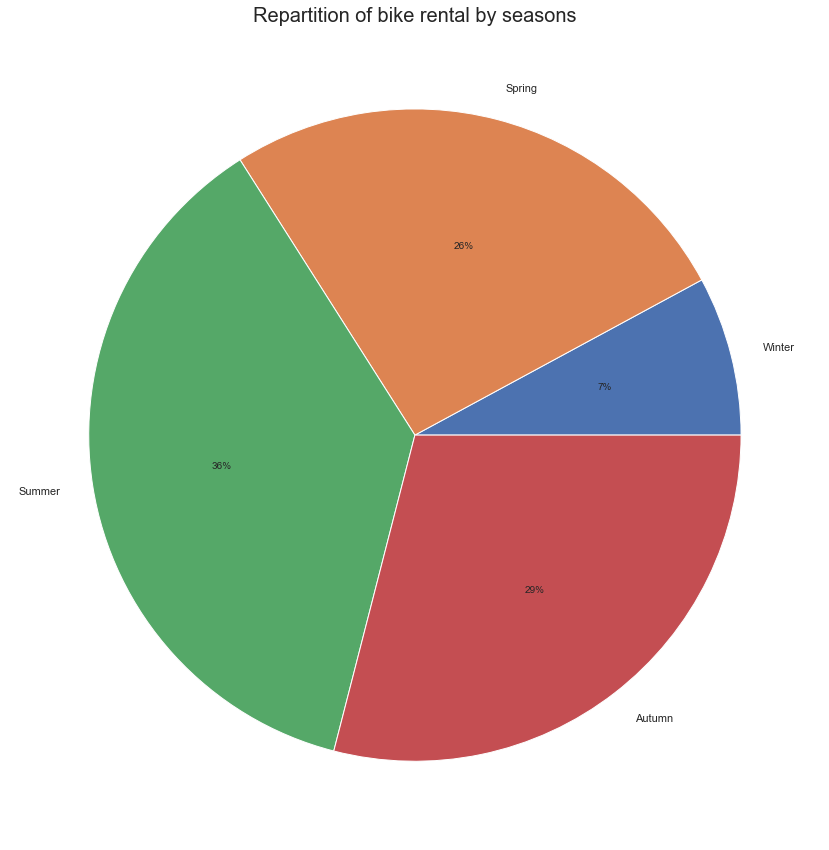

In [267]:
Winter=SeoulBikeDf[SeoulBikeDf["Seasons"]==0].sum()
Spring=SeoulBikeDf[SeoulBikeDf["Seasons"]==1].sum()
Summer=SeoulBikeDf[SeoulBikeDf["Seasons"]==2].sum()
Autumn=SeoulBikeDf[SeoulBikeDf["Seasons"]==3].sum()

BikeSeasons={"Winter":Winter["Rented Bike Count"],"Spring":Spring["Rented Bike Count"],"Summer":Summer["Rented Bike Count"],"Autumn":Autumn["Rented Bike Count"]}
plt.gcf().set_size_inches(15,15)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bike rental by seasons", fontsize=20)
plt.show()
#The season or we have the most rented bike is during the summer and they are too lot of rented bike during the autumn

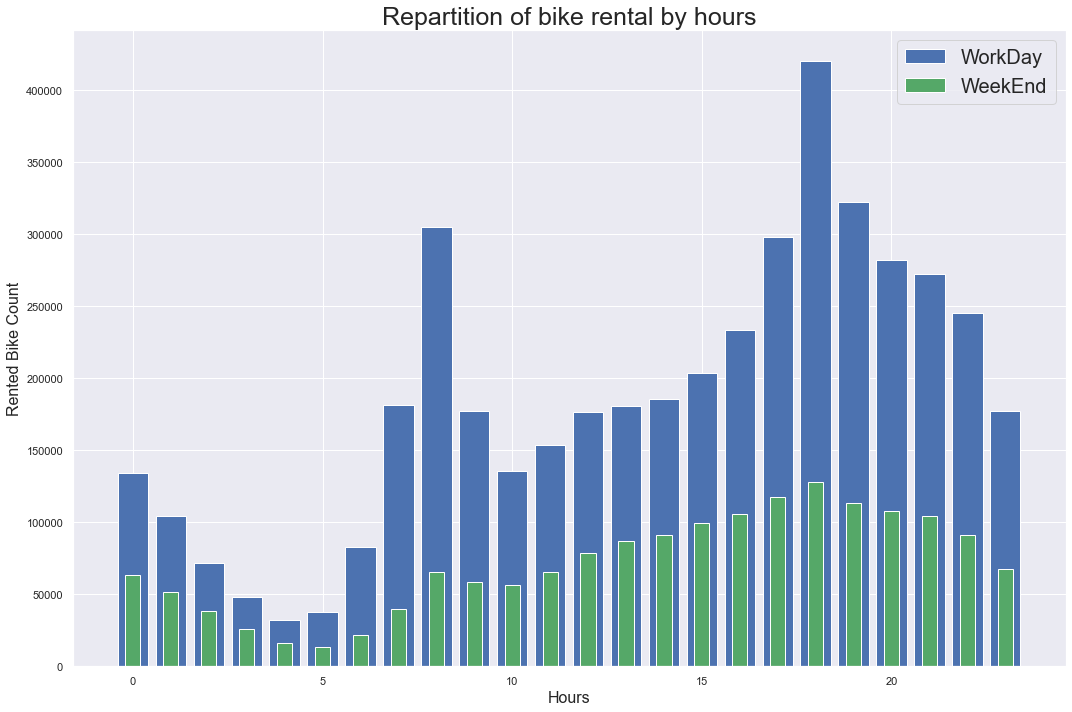

In [268]:
BikeHoursWorkDay={}
for k in range(24):
    BikeHoursWorkDay[k] = SeoulBikeDf[(SeoulBikeDf["Hour"] == k) & SeoulBikeDf["Dayofweek"].between(1, 5)].sum()["Rented Bike Count"]

BikeHoursWeekEnd={}
for k in range(24):
    BikeHoursWeekEnd[k] = SeoulBikeDf[(SeoulBikeDf["Hour"] == k) & SeoulBikeDf["Dayofweek"].between(6, 7)].sum()["Rented Bike Count"]
    
fig, ax = plt.subplots()
p1 = ax.bar(BikeHoursWorkDay.keys(), BikeHoursWorkDay.values(), color='b', label ="WorkDay")
p2 = ax.bar(BikeHoursWeekEnd.keys(), BikeHoursWeekEnd.values(), color='g', label ="WeekEnd", width= 0.4)
plt.gcf().set_size_inches(15,10)
plt.title("Repartition of bike rental by hours", fontsize = 25)
plt.xlabel('Hours', fontsize = 16)
plt.ylabel('Rented Bike Count', fontsize = 16)
fig.tight_layout()
ax.legend(fontsize=20)
plt.show()
#We can see of they are more bicle rented in the evening ( 17h - 20h ) and they are more bike rented in workday of week-end

In [269]:
# Temperature rented bike count
output_notebook() 
p = figure(plot_width = 950, plot_height = 400, title="Repartition of bike rental by temperature", x_axis_label="Temperature(°C)", y_axis_label="Rented Bike Count") 
p.title.text_font_size = "25px"
p.xaxis.axis_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font_size = "15pt"
dfTemp = SeoulBikeDf['Temperature(°C)'].astype(int)

# create linear color mapper
mapper = linear_cmap(field_name="x", palette=Turbo256, low=min(dfTemp), high=max(dfTemp))
p.vbar(x=dfTemp, top=SeoulBikeDf['Rented Bike Count'], width=0.5, bottom=0, color=mapper) 
show(p)
#We can conclude of the people like rented bike between 20 and 30 degrees

Loading BokehJS ...

In [270]:
# rented by weather
# create a new plot with a title and axis labels
p = figure(plot_width = 950, plot_height = 500,title="Action of weathers conditions on rented bike", x_axis_label="x", y_axis_label="Rented Bike Count")
p.title.text_font_size = "25px"
p.xaxis.axis_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font_size = "15pt"

# add weather condition
p.vbar(x = SeoulBikeDf['Wind speed (m/s)'].astype(int), top = SeoulBikeDf['Rented Bike Count'], legend_label="Wind speed (m/s)", color="blue", line_width=2)
p.vbar(x = SeoulBikeDf['Solar Radiation (MJ/m2)'].astype(int), top =  SeoulBikeDf['Rented Bike Count'], legend_label="Solar Radiation (MJ/m2)", color="red", line_width=2)
p.vbar(x = SeoulBikeDf['Rainfall(mm)'].astype(int), top =  SeoulBikeDf['Rented Bike Count'], legend_label="Rainfall(mm)", color="orange", line_width=2)
p.vbar(x = SeoulBikeDf['Snowfall (cm)'].astype(int), top =  SeoulBikeDf['Rented Bike Count'], legend_label="Snowfall (cm)", color="green", line_width=2)

# show the results
show(p)
#we can observ of the only condition wether which not problematic for the rented is the rainfall

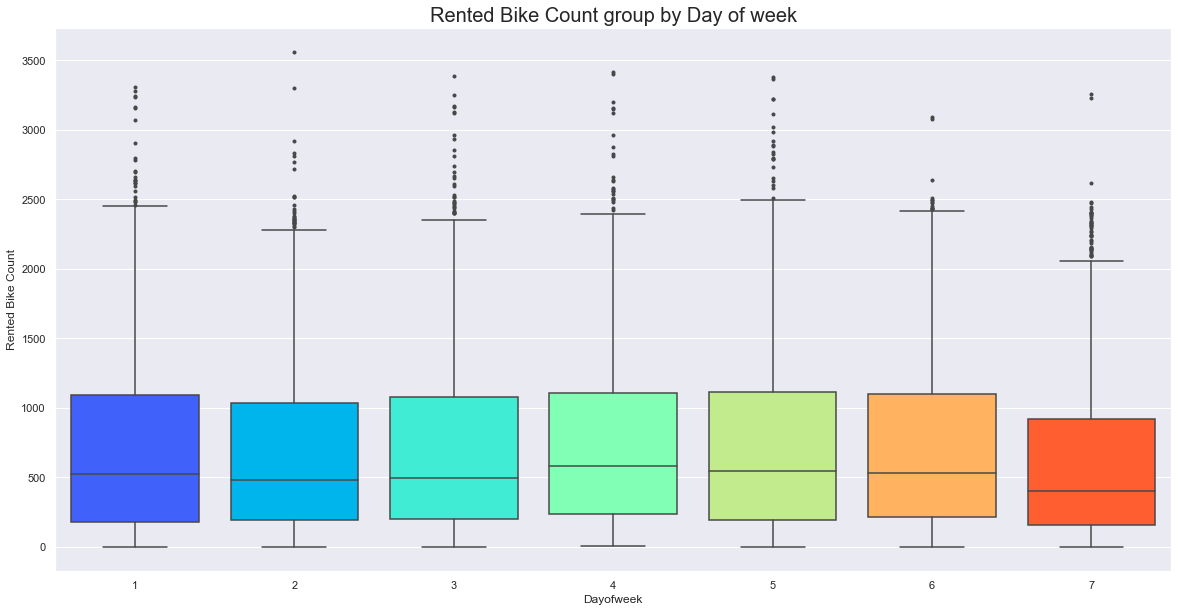

In [272]:
flierprops = dict(marker='o', markersize=3)
sns.boxplot(x="Dayofweek", y="Rented Bike Count",palette="rainbow", data=SeoulBikeDf,saturation=1,flierprops=flierprops).set_title("Rented Bike Count group by Day of week",fontsize = 20)
sns.set(rc={'figure.figsize':(20,10)})
#No day of the week has more bike rental than other

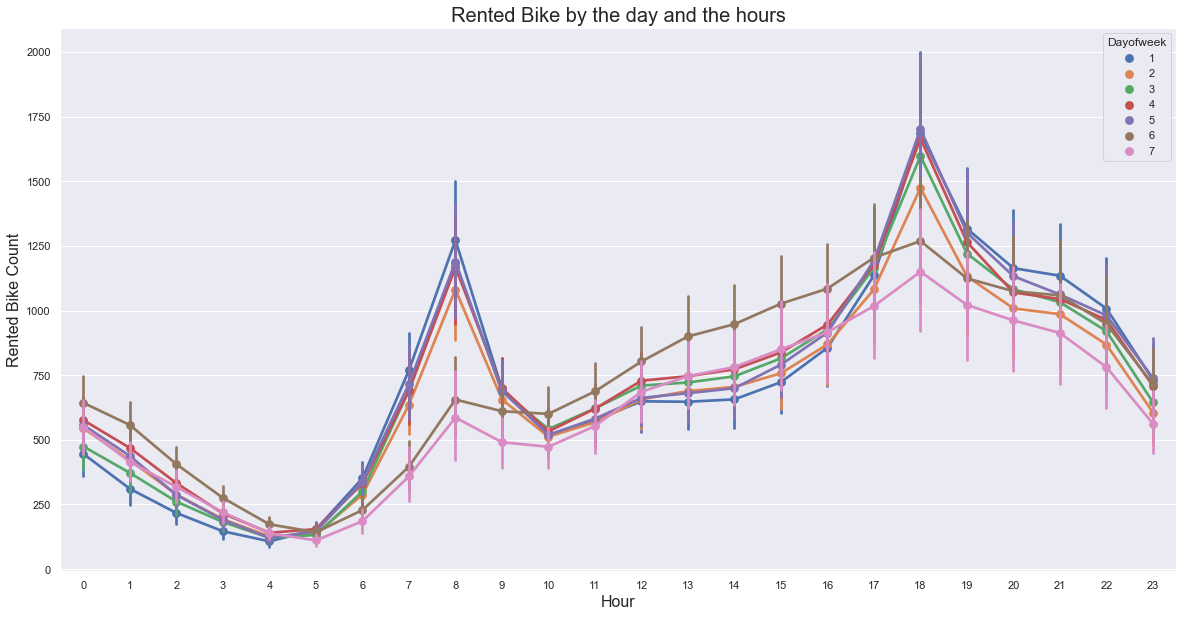

In [273]:
sns.pointplot(x = "Hour", y = "Rented Bike Count", hue = "Dayofweek", data=SeoulBikeDf)
plt.title("Rented Bike by the day and the hours", fontsize=20)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Rented Bike Count', fontsize=16)
plt.show()
# The greater values is 5 so its friday
# We can observe of the best rented bike is the friday at 6pm

## 5) Utils

In [274]:
# Function which return the grid fitting
def GetScoreHyperparametres(algo, x, y, hyperparametres):
    grid = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(x, y)
    ExactScore = round(grid.score(x,y) * 100,2)
    
    print('Best Accuracy for this model : ' + str(ExactScore) + '% with hyperparametres : ' + str(grid.best_estimator_))
    return grid , ExactScore

In [275]:
# Function for calculate the time for the scoring fitting and return a tuple
def TimeOfModel(func,*args):
    start_time = time.time()
    return func(*args) , round(time.time() - start_time,3)

In [276]:
# For each model we display all accuracy and we stock only the best
def BestModelWithoutTraining(namefunc, func):
    bestModel = 1
    bestModelTime = 0
    bestModelExactValue = 0
    incModel = 1
    
    for x in listFeatures:
        exactmodel = TimeOfModel(func, x, y)
        print(namefunc + 'Model ' + str(incModel) + ' r2 accuracy : ' + str(exactmodel[0]) + '% in ' + str(exactmodel[1]) + 'secondes')
        if(bestModelExactValue < exactmodel[0]):
                bestModel = incModel
                bestModelTime = exactmodel[1]
                bestModelExactValue = exactmodel[0]
        incModel = incModel + 1
    print("Best exact" + namefunc + " model is : " + str(bestModel) + " with " + str(bestModelExactValue) + '%')
    return [namefunc, str(bestModel), bestModelTime, bestModelExactValue]

In [277]:
#function for take the gridsearch on all model
def BestModelWithTraining(namefunc, func, algo, hyperparametres):
    bestModel = 1
    bestModelTime = 0
    bestModelExactValue = 0
    incModel = 1
    for i in listFeatures:
        print('Calcul du model ' + str(incModel) + ' en cours ...')
        x_train, x_test, y_train, y_test = train_test_split(i, y, test_size=0.33)
        
        #Scale
        scaler = StandardScaler()
        scaler.fit(x_train)       
        x_train = scaler.transform(x_train, copy = False)
        x_test  = scaler.transform(x_test, copy = False)
        
        #Find Model
        InfoModel , time = TimeOfModel(func, algo, x_train, y_train, hyperparametres)           
        
        #Save the best model
        if(bestModelExactValue < InfoModel[1]):
                bestModel = incModel
                bestModelTime = time
                bestModelExactValue = InfoModel[1]
        incModel = incModel + 1
    print("Best exact" + namefunc + " model is : " + str(bestModel) + " with " + str(bestModelExactValue) + '%')
    return [namefunc, bestModel, bestModelTime, bestModelExactValue]

In [278]:
# Generate a dataframe or we stock the best model for each methods
ResultDf = pd.DataFrame()
def StockResultDf(tab):
    global ResultDf
    df2 = {'Model Name': tab[0], 'bestModel': tab[1], 'Time(s)': tab[2], 'R2 Value (%)' : tab[3]}
    ResultDf = ResultDf.append(df2,ignore_index=True)

## 6) Data-visualization

For decide of the best models, we going to focus on the R2 value

In [279]:
#We separe the target of features
#Target for first methods
y = SeoulBikeDf1["Rented Bike Count"]

#Features
x1 = SeoulBikeDf1.drop(['Rented Bike Count'], axis = 1)
x2 = SeoulBikeDf2.drop(['Rented Bike Count'], axis = 1)
x3 = SeoulBikeDf3.drop(['Rented Bike Count'], axis = 1)
x4 = SeoulBikeDf4.drop(['Rented Bike Count'], axis = 1)
x5 = SeoulBikeDf5.drop(['Rented Bike Count'], axis = 1)

#Create list for features
listFeatures = [x1, x2, x3, x4, x5]

In [280]:
def KNN(x,y):
    KnnModel = KNeighborsClassifier(n_neighbors=2)
    KnnModel.fit(x,y)
    return round(KnnModel.score(x,y) * 100,2)

In [281]:
#KNN Model
StockResultDf(BestModelWithoutTraining("KNN", KNN))

KNNModel 1 r2 accuracy : 51.1% in 0.24secondes
KNNModel 2 r2 accuracy : 50.84% in 0.258secondes
KNNModel 3 r2 accuracy : 51.22% in 0.216secondes
KNNModel 4 r2 accuracy : 49.47% in 0.235secondes
KNNModel 5 r2 accuracy : 48.7% in 0.325secondes
Best exactKNN model is : 3 with 51.22%


In [282]:
#Linear Regression model
def LinearRegressionModel(x,y):
    LinearModel = LinearRegression()
    LinearModel.fit(x, y)
    return round(LinearModel.score(x,y) * 100,2)

In [283]:
StockResultDf(BestModelWithoutTraining("Linear Regression", LinearRegressionModel))
ResultDf

Linear RegressionModel 1 r2 accuracy : 54.5% in 0.01secondes
Linear RegressionModel 2 r2 accuracy : 54.53% in 0.008secondes
Linear RegressionModel 3 r2 accuracy : 50.11% in 0.007secondes
Linear RegressionModel 4 r2 accuracy : 50.11% in 0.005secondes
Linear RegressionModel 5 r2 accuracy : 54.72% in 0.008secondes
Best exactLinear Regression model is : 5 with 54.72%


,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5


In [284]:
#FIND with Grid Search the better hyperparameters for model 1
#Create train and test set
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.33)

#Scale
scaler = StandardScaler()
scaler.fit(x_train)                 # Il ne faut fiter que sur les data d'entrainement
x_train = scaler.transform(x_train, copy = False)
x_test  = scaler.transform(x_test, copy = False)

In [285]:
# Going further default parameters to grid search
parameters = {'gamma':[0.01, 0.025, 0.05, 0.75, 0.1, 0.25, 0.5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,2)) + '% with Gamma : ' + str(grid.best_estimator_))

Best Accuracy : 26.46% with Gamma : SVR(gamma=0.05)


In [286]:
# Remake for find the better gamma and a good C
parameters = {'gamma':[0.03, 0.04, 0.05, 0.06 ,0.07], 'C' : [0.5, 1, 2, 3, 5, 10]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,2)) + '% with Gamma and C : ' + str(grid.best_estimator_))

Best Accuracy : 61.09% with Gamma and C : SVR(C=10, gamma=0.07)


In [287]:
# Now we Find the degree and affine C
parameters = {'gamma' : [0.065,0.07,0.075], 'C' : [10, 15, 20], 'degree' : [0.15, 0.25, 0.5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,3)) + '% with Gamma , degree and C : ' + str(grid.best_estimator_))

Best Accuracy : 65.527% with Gamma , degree and C : SVR(C=20, degree=0.15, gamma=0.075)


In [288]:
# Finish by search the kernel
parameters = {'C' : [20, 50, 100], 'kernel' : ['rbf','poly','sigmoid','linear'], 'gamma' : [0.073, 0.075, 0.077], 'degree' : [0.10, 0.15, 0.20]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,3)) + '% with Gamma, C, degree : ' + str(grid.best_estimator_))

Best Accuracy : 71.123% with Gamma, C, degree : SVR(C=100, degree=0.1, gamma=0.077)


In [289]:
#We retake this for all models because is the same best hyperparameters
params = {
            'C' : [20, 50, 100], 
            'kernel' : ['rbf','poly','sigmoid','linear'], 
            'gamma' : [0.073, 0.075, 0.077], 
            'degree' : [0.10, 0.15, 0.20]
}
StockResultDf(BestModelWithTraining('Cross Validation',GetScoreHyperparametres,svm.SVR(),params))
ResultDf

Calcul du model 1 en cours ...
Best Accuracy for this model : 72.58% with hyperparametres : SVR(C=100, degree=0.1, gamma=0.077)
Calcul du model 2 en cours ...
Best Accuracy for this model : 72.96% with hyperparametres : SVR(C=100, degree=0.1, gamma=0.077)
Calcul du model 3 en cours ...
Best Accuracy for this model : 65.14% with hyperparametres : SVR(C=100, degree=0.1, gamma=0.077)
Calcul du model 4 en cours ...
Best Accuracy for this model : 65.52% with hyperparametres : SVR(C=100, degree=0.1, gamma=0.077)
Calcul du model 5 en cours ...
Best Accuracy for this model : 69.79% with hyperparametres : SVR(C=100, degree=0.1, gamma=0.077)
Best exactCross Validation model is : 2 with 72.96%


,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5
2,Cross Validation,72.96,177.208,2


In [290]:
#Lasso
params = {  
            "max_iter"  : [ 250, 500, 1000, 1500 ],
            "alpha"     : [ 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0], 
            "selection" : ["random", "cyclic"]
}
StockResultDf(BestModelWithTraining('Lasso', GetScoreHyperparametres, Lasso(), params))
ResultDf

Calcul du model 1 en cours ...
Best Accuracy for this model : 54.94% with hyperparametres : Lasso(alpha=0.8, max_iter=250, selection='random')
Calcul du model 2 en cours ...
Best Accuracy for this model : 53.98% with hyperparametres : Lasso(max_iter=250, selection='random')
Calcul du model 3 en cours ...
Best Accuracy for this model : 49.26% with hyperparametres : Lasso(selection='random')
Calcul du model 4 en cours ...
Best Accuracy for this model : 50.02% with hyperparametres : Lasso(max_iter=1500, selection='random')
Calcul du model 5 en cours ...
Best Accuracy for this model : 55.21% with hyperparametres : Lasso(alpha=0.8, max_iter=1500, selection='random')
Best exactLasso model is : 5 with 55.21%


,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5
2,Cross Validation,72.96,177.208,2
3,Lasso,55.21,0.501,5


In [291]:
#AdaBoostRegressor
params = {
    "n_estimators"         : [50, 100, 150],
    'loss'                 : ["linear", "square", "exponential"]
}
StockResultDf(BestModelWithTraining('AdaBoost', GetScoreHyperparametres, AdaBoostRegressor(), params))
ResultDf

Calcul du model 1 en cours ...
Best Accuracy for this model : 63.33% with hyperparametres : AdaBoostRegressor(loss='square')
Calcul du model 2 en cours ...
Best Accuracy for this model : 57.35% with hyperparametres : AdaBoostRegressor(loss='square')
Calcul du model 3 en cours ...
Best Accuracy for this model : 51.06% with hyperparametres : AdaBoostRegressor(n_estimators=100)
Calcul du model 4 en cours ...
Best Accuracy for this model : 48.16% with hyperparametres : AdaBoostRegressor()
Calcul du model 5 en cours ...
Best Accuracy for this model : 55.94% with hyperparametres : AdaBoostRegressor(loss='square')
Best exactAdaBoost Regressor model is : 1 with 63.33%


,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5
2,Cross Validation,72.96,177.208,2
3,Lasso,55.21,0.501,5
4,AdaBoost Regressor,63.33,6.542,1


In [292]:
#Extra trees
params = {
    "n_estimators"         : [50, 100, 150],
    'max_depth'            : [5],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('ExtraTrees', GetScoreHyperparametres, ExtraTreesRegressor(), params))
ResultDf

Calcul du model 1 en cours ...
Best Accuracy for this model : 71.04% with hyperparametres : ExtraTreesRegressor(max_depth=5, n_estimators=50)
Calcul du model 2 en cours ...
Best Accuracy for this model : 70.31% with hyperparametres : ExtraTreesRegressor(bootstrap=True, max_depth=5, n_estimators=50)
Calcul du model 3 en cours ...
Best Accuracy for this model : 66.68% with hyperparametres : ExtraTreesRegressor(max_depth=5, n_estimators=50)
Calcul du model 4 en cours ...
Best Accuracy for this model : 67.54% with hyperparametres : ExtraTreesRegressor(max_depth=5)
Calcul du model 5 en cours ...
Best Accuracy for this model : 71.62% with hyperparametres : ExtraTreesRegressor(bootstrap=True, max_depth=5, n_estimators=150)
Best exactExtraTrees model is : 5 with 71.62%


,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5
2,Cross Validation,72.96,177.208,2
3,Lasso,55.21,0.501,5
4,AdaBoost Regressor,63.33,6.542,1
5,ExtraTrees,71.62,2.494,5


In [293]:
#Random Forest
params = {
    "n_estimators"         : [50, 100, 150],
    'max_depth'            : [5],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('Random Forest', GetScoreHyperparametres, RandomForestRegressor(), params))
ResultDf

Calcul du model 1 en cours ...
Best Accuracy for this model : 77.01% with hyperparametres : RandomForestRegressor(max_depth=5, n_estimators=150)
Calcul du model 2 en cours ...
Best Accuracy for this model : 76.64% with hyperparametres : RandomForestRegressor(max_depth=5, n_estimators=150)
Calcul du model 3 en cours ...
Best Accuracy for this model : 72.2% with hyperparametres : RandomForestRegressor(max_depth=5)
Calcul du model 4 en cours ...
Best Accuracy for this model : 71.06% with hyperparametres : RandomForestRegressor(max_depth=5)
Calcul du model 5 en cours ...
Best Accuracy for this model : 76.66% with hyperparametres : RandomForestRegressor(max_depth=5, n_estimators=150)
Best exactRandom Forest model is : 1 with 77.01%


,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5
2,Cross Validation,72.96,177.208,2
3,Lasso,55.21,0.501,5
4,AdaBoost Regressor,63.33,6.542,1
5,ExtraTrees,71.62,2.494,5
6,Random Forest,77.01,6.850,1


In [294]:
#XGBoost
params = {
    "max_depth" : [4],
    "gamma" : [0.077, 0.5, 0.75, 1]
}
StockResultDf(BestModelWithTraining('XGBoost', GetScoreHyperparametres, XGBRegressor(), params))
ResultDf

Calcul du model 1 en cours ...
Best Accuracy for this model : 93.32% with hyperparametres : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.077, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Calcul du model 2 en cours ...
Best Accuracy for this model : 94.62% with hyperparametres : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.077, gpu_id=-1

,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5
2,Cross Validation,72.96,177.208,2
3,Lasso,55.21,0.501,5
4,AdaBoost Regressor,63.33,6.542,1
5,ExtraTrees,71.62,2.494,5
6,Random Forest,77.01,6.850,1
7,XGBoost,94.62,2.235,2


In [295]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
params = {
    "n_estimators"         : [10, 25],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('Bagging Regressor', GetScoreHyperparametres, BaggingRegressor(), params))
ResultDf

Calcul du model 1 en cours ...
Best Accuracy for this model : 98.19% with hyperparametres : BaggingRegressor(n_estimators=25)
Calcul du model 2 en cours ...
Best Accuracy for this model : 98.4% with hyperparametres : BaggingRegressor(n_estimators=25)
Calcul du model 3 en cours ...
Best Accuracy for this model : 97.7% with hyperparametres : BaggingRegressor(n_estimators=25)
Calcul du model 4 en cours ...
Best Accuracy for this model : 97.77% with hyperparametres : BaggingRegressor(n_estimators=25)
Calcul du model 5 en cours ...
Best Accuracy for this model : 98.25% with hyperparametres : BaggingRegressor(n_estimators=25)
Best exactBagging Regressor model is : 2 with 98.4%


,Model Name,R2 Value (%),Time(s),bestModel
0,KNN,51.22,0.216,3
1,Linear Regression,54.72,0.008,5
2,Cross Validation,72.96,177.208,2
3,Lasso,55.21,0.501,5
4,AdaBoost Regressor,63.33,6.542,1
5,ExtraTrees,71.62,2.494,5
6,Random Forest,77.01,6.850,1
7,XGBoost,94.62,2.235,2
8,Bagging Regressor,98.40,2.373,2


Conclusion : The keep Bagging with the second model because he have the best r2 score

# API